In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

## Functions

In [2]:
# using binary cross entropy as loss and gradient descent for optimization

def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

# Loss function (Binary cross entropy)
def loss(X, Y, weights, bias):
    Y_ = activation(X, weights, bias)
    cost = np.mean(-Y*np.log(Y_)) + np.mean(-(1-Y)*np.log(1-Y_))
    return cost

def update(X, Y, weights, bias, learning_rate):
    Y_ = activation(X, weights, bias)
    
    dw = np.dot(X.T,Y_-Y)
    db = np.sum(Y_-Y)
    
    m = X.shape[0]
    
    weights -= learning_rate*dw/float(m)
    bias -= learning_rate*db/float(m)
    
    return weights,bias

def train(X,Y,learning_rate=0.5,maxEpochs=100):
    weights = np.zeros(X.shape[1])
    bias = 0
    
    for epoch in range(maxEpochs):
        
        weights, bias = update(X,Y,weights,bias,learning_rate)
        
        if epoch%10 == 0:
            l = loss(X, Y, weights, bias)
            print("Epoch %d Loss %.4f"%(epoch, l))
        
    return weights, bias

def activation(X, weights, bias):
    z = np.dot(X, weights) + bias
    probs = sigmoid(z)
    return probs

def getPredictions(X_Test, weights, bias):
    probs = activation(X_Test, weights, bias)
    labels = np.zeros(probs.shape)
    labels[probs>=0.5] = 1
    return labels

## Data Generation

In [4]:
X,Y = make_blobs(n_samples=500,centers=2,n_features=2,random_state=10)

## Training

In [5]:
weights, bias = train(X,Y, maxEpochs=200)

Epoch 0 Loss 0.0006
Epoch 10 Loss 0.0005
Epoch 20 Loss 0.0005
Epoch 30 Loss 0.0005
Epoch 40 Loss 0.0005
Epoch 50 Loss 0.0004
Epoch 60 Loss 0.0004
Epoch 70 Loss 0.0004
Epoch 80 Loss 0.0004
Epoch 90 Loss 0.0004
Epoch 100 Loss 0.0004
Epoch 110 Loss 0.0003
Epoch 120 Loss 0.0003
Epoch 130 Loss 0.0003
Epoch 140 Loss 0.0003
Epoch 150 Loss 0.0003
Epoch 160 Loss 0.0003
Epoch 170 Loss 0.0003
Epoch 180 Loss 0.0003
Epoch 190 Loss 0.0003


In [6]:
print(weights, bias)

[-0.26726659  1.95420335] 0.0371172352765


## Decision Surface 

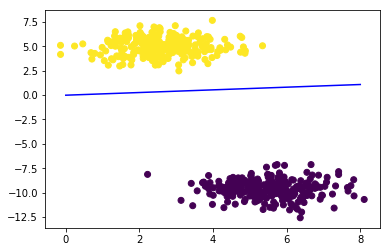

In [10]:
x1 = np.linspace(0,8,10)
x2 = -(bias+x1*weights[0])/weights[1]

plt.scatter(X[:,0], X[:,1], c=Y)
plt.plot(x1, x2, c='blue')
plt.show()

## Accuracy

In [14]:
# since the data is linearly separable the accuracy should be 100%

pred = getPredictions(X, weights, bias)
accuracy = np.mean(pred == Y)
print(accuracy)

1.0
